In [1]:
import heapq

def manhattan_distance(a, b):
    """Heuristic: Manhattan distance between two points a=(r1,c1), b=(r2,c2)."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def greedy_bfs_maze(maze, source, destination):
    rows  = len(maze)
    cols  = len(maze[0])
    pq = [(manhattan_distance(source, destination), source)] # there is distance between two nodes and source in the priority queue.
    parent = {source: None}
    explored_set = set()

    directions = [(-1,0), (1,0), (0,1), (0,-1)]  #[up,down,right,left]

    while pq:
        _, (r, c) = heapq.heappop(pq)

        if (r, c) in explored_set:
            continue
        explored_set.add((r, c))

        if (r, c) == destination:
            # reconstruct path
            path = []
            while (r, c) is not None:
                path.append((r, c))
                r_c_parent = parent[(r, c)]
                if r_c_parent is None:
                    break
                (r, c) = r_c_parent
            return path[::-1]

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:  # check if rows and colomn are in limit and its value is 0
                if (nr, nc) not in explored_set:
                    heapq.heappush(pq, (manhattan_distance((nr, nc), destination), (nr, nc)))
                    if (nr, nc) not in parent:
                        parent[(nr, nc)] = (r, c)
    return None

def print_maze_with_path(maze, path):
    maze_copy = [row[:] for row in maze]
    for r, c in path:
        maze_copy[r][c] = "*"
    print("\nMaze with path:")
    for row in maze_copy:
        print(" ".join(str(cell) for cell in row))


# Example Maze
maze = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

source = (0, 0)
destination = (4, 4)

path = greedy_bfs_maze(maze, source, destination)

if path:
    print("Greedy BFS Path:", path)
    print_maze_with_path(maze, path)
else:
    print("No path found!")


Greedy BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]

Maze with path:
* * * 1 0
1 1 * 1 0
0 0 * * *
0 1 1 1 *
0 0 0 0 *


Greedy BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2)]


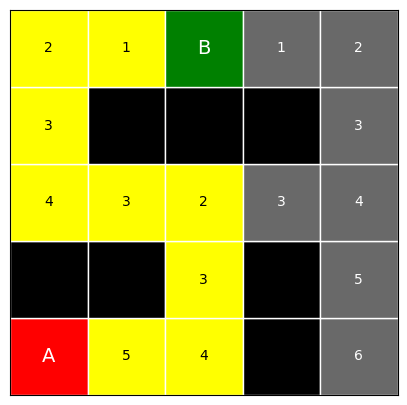

In [2]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def greedy_bfs_maze(maze, source, destination):
    rows, cols = len(maze), len(maze[0])
    pq = [(manhattan_distance(source, destination), source)]
    parent = {source: None}
    explored_set = set()
    directions = [(-1,0), (1,0), (0,1), (0,-1)]

    while pq:
        _, (r, c) = heapq.heappop(pq)
        if (r, c) in explored_set:
            continue
        explored_set.add((r, c))

        if (r, c) == destination:
            path = []
            while (r, c) is not None:
                path.append((r, c))
                r_c_parent = parent[(r, c)]
                if r_c_parent is None:
                    break
                (r, c) = r_c_parent
            return path[::-1]

        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                if (nr, nc) not in explored_set:
                    heapq.heappush(pq, (manhattan_distance((nr, nc), destination), (nr, nc)))
                    if (nr, nc) not in parent:
                        parent[(nr, nc)] = (r, c)
    return None

def draw_maze(maze, source, destination, path):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots(figsize=(cols, rows))

    for r in range(rows):
        for c in range(cols):
            if maze[r][c] == 1:
                color = "black"  # wall
            else:
                color = "dimgray"  # free space

            if (r, c) in path and (r, c) != source and (r, c) != destination:
                color = "yellow"
            if (r, c) == source:
                color = "red"
            if (r, c) == destination:
                color = "green"

            rect = plt.Rectangle((c, rows-r-1), 1, 1, facecolor=color, edgecolor="white")
            ax.add_patch(rect)

            if maze[r][c] == 0 or (r, c) in [source, destination]:
                if (r, c) == source:
                    ax.text(c+0.5, rows-r-1+0.5, "A", va='center', ha='center', fontsize=14, color="white")
                elif (r, c) == destination:
                    ax.text(c+0.5, rows-r-1+0.5, "B", va='center', ha='center', fontsize=14, color="white")
                else:
                    h = manhattan_distance((r, c), destination)
                    text_color = "black" if (r, c) in path else "white"
                    ax.text(c+0.5, rows-r-1+0.5, str(h), va='center', ha='center', fontsize=10, color=text_color)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    plt.show()

# Example Maze
maze = [
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

source = (0, 0)
destination = (4, 2)

path = greedy_bfs_maze(maze, source, destination)

if path:
    print("Greedy BFS Path:", path)
    draw_maze(maze, source, destination, path)
else:
    print("No path found!")
